# Week 2 Exercises
## Basic Semantic Technologies
* 2.1 How to Identify and Access Things
* 2.2 How to Represent Simple Facts with RDF
* 2.3 RDF Turtle Serialization
* 2.4 RDF Complex Data Structures
* 2.5 Model Building with RDFS
* 2.6 Logical Inference with RDF(S)
* Excursion 1: RDFa - RDF and the We

## RDF(S) - Resourse Description Framework (Schema):
* Individuals (Entities) - *subject or object URI, ex: `<http://dbpedia.org/resource/Greenhouse_effect>`*
* Classes - *a category URI, ex: `<http://dbpedia.org/category/Athmosphere>`*
* Properties - *predicate URI, ex: `<http://dbpedia.org/ontology/birthdate>`*
* Literals - *objects like: `“47.798599”^^xsd:float`*
    * and untyped literals - like `"helloworld"`
* Vocabularies / Ontologies - *a set containing URIs and literals, ex: `http://www.w3.org/2003/01/geo/wgs84_pos`*
* __URIs__ identify and reference resources uniquely.
* __Literals__ describe data values that don’t have a separate existence.

See slides for details.

## Import modules and libraries

In [29]:
import pandas as pd
import networkx as nx
from graphviz import Digraph
import matplotlib.pyplot as plt
%matplotlib inline

## 2.1 How to access things

In [7]:
!curl -L -H "Accept: text/html" http://dbpedia.org/resource/Earth

In [8]:
!curl -L -H "Accept: application/rdf+xml" http://dbpedia.org/resource/Earth

### Question 1
Select the correct statement(s) about the designatum.

* [ ] The designatum designates a webpage.
* [x] The designatum is a resource.
* [x] The designatum is described by the designator.
* [ ] The designatum is a representation of a resource.

### Question 2
What is a URI?

* [ ] A schema to identify what exists on the web.
* [x] An identifier for a designatum.
* [ ] An identifier only for digital objects.
* [x] An extension of the URL concept.
* [ ] The acronym for Universal Resource Identifier.
* [x] A schema for identification of abstract or physical resources.

### Question 3
What is HTTP content negotiation?

* [x] A mechanism to serve multiple representations at the same place.
* [ ] A mechanism to store a designator at the same place as the designatum.
* [ ] A mechanism to always serve the same representation at multiple places.

### Question 4
Which request(s) would cause the server to respond with `HTTP/2 303 See Other Location: http://dbpedia.org/data/Joseph_Fourier` ?

* [ ] `HTTP GET http://dbpedia.org/resource/Earth "Accept: image/jpg"`
* [x] `HTTP POST http://dbpedia.org/resource/Joseph_Fourier Accept Header: application/rdf+xml`
* [x] `HTTP GET http://dbpedia.org/resource/Joseph_Fourier Accept Header: application/rdf+xml`
* [ ] `HTTP GET http://dbpedia.org/resource/Joseph_Fourier Accept Header: text/*`

## 2.2 How to Represent simple Facts with RDF

In [11]:
fact="The Greenhouse Effect has been discovered in 1824"

`subject   predicate   object`

In [11]:
subject_="Greenhouse Effect"
predicate_="has been discovered in"
object_="1824"

In [123]:
#!pip install pygraphviz
#https://graphviz.readthedocs.io/en/stable/manual.html

# also see this example for making a netwrokx graph and converting DOT: 
#.  https://stackoverflow.com/questions/40092390/network-graph-is-not-visually-optimized-in-networkx
#.  https://pygraphviz.github.io/documentation/latest/tutorial.html#layout-and-drawing

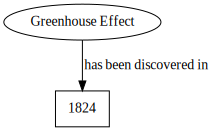

In [150]:
g = Digraph()
g.attr('node', shape='oval')
g.node('A', subject_)
g.attr('node', shape='rectangle')
g.node('B', object_)

g.edge('A', 'B', label=predicate_)


g

### N-triples serialization
(predicate == property)

`subject [URI]   property [URI]   object [URI | literal] .`

Example:
`<http://dbpedia.org/resource/Greenhouse_effect> <http://dbpedia.org/ontology/discoveredIn> “1824” .`

### 2.2 RDF Triples examples:

```
<http://dbpedia.org/resource/Greenhouse_effect> <http://dbpedia.org/ontology/discoveredIn> “1824” .
<http://dbpedia.org/resource/Greenhouse_effect> <http://dbpedia.org/ontology/discoverer> <http://dbpedia.org/resource/Joseph_Fourier> .
<http://dbpedia.org/resource/Greenhouse_effect> <http://purl.org/dc/terms/subject> <http://dbpedia.org/category/Climate_change> .
<http://dbpedia.org/resource/Greenhouse_effect> <http://purl.org/dc/terms/subject> <http://dbpedia.org/category/Athmosphere> .
 
<http://dbpedia.org/resource/Joseph_Fourier> <http://dbpedia.org/ontology/birthdate> “1768-03-21” .
<http://dbpedia.org/resource/Joseph_Fourier> <http://dbpedia.org/ontology/birthplace> <http://dbpedia.org/resource/Auxerre> .
<http://dbpedia.org/resource/Joseph_Fourier> <http://dbpedia.org/ontology/field> <http://dbpedia.org/resource/Physicist> .
 
<http://dbpedia.org/resource/Auxerre> <http://dbpedia.org/ontology/country> <http://dbpedia.org/resource/France> .
<http://dbpedia.org/resource/Auxerre> <http://www.w3.org/2003/01/geo/wgs84_pos#lat> “47.798599”^^xsd:float .
<http://dbpedia.org/resource/Auxerre> <http://www.w3.org/2003/01/geo/wgs84_pos#long> “3.567200”^^xsd:float .
```

## 2.3 Turtle (Terse RDF Triple Language) Serialization
Provides shortcuts for making RDF easier to read.
* `@prefix` directive associates prefix-label with URI
* `@base` directive provides URI to complement all relative URIs
* `;` separates subject from property & object 
* `,` separates subject & property from object


Example in Turtle:
```
@prefix book: <http://semantic-web-book.org/> . 
@prefix ex: <http://example.org/> . 
@prefix crc: <http://crcpress.com/> .
book:uri ex:publishedBy crc:uri . 
book:uri ex:title "Foundations of Semantic Web Technologies" . 
crc:uri ex:name "CRC Press" .
```

### 2.3:Q1 Exercise: 
Rewite the N-triples in __2.2 RDF Examples__ using Turtle syntax, in the most compact way.   Use a validator to make sure your code is syntactically valid.   

* http://librdf.org/parse

```
@prefix dbr: <http://dbpedia.org/resource/> .
@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix dbc: <http://dbpedia.org/category/> .
@prefix pt:  <http://purl.org/dc/terms> .         
@prefix geo: <http://www.w3.org/2003/01/geo/wgs84_pos#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
        
        
dbr:Greenhouse_effect dbo:discoveredIn "1824" ;
                    dbo:discoverer dbr:Joseph_Fourier ;
                    pt:subject dbc:Climate_change ,
                               dbc:Athmosphere .

dbr:Joseph_Fourier dbo:birthdate "1768-03-21"^^xsd:date ;
                    dbo:birthplace dbr:Auxerre ;
                    dbo:field dbr:Physicist .

dbr:Auxerre dbo:country dbr:France ;
                    geo:lat "47.798599"^^xsd:float ;
                    geo:long "3.567200"^^xsd:float .
```

### Turtle Parsing Results

In [78]:
# go to http://librdf.org/parse,
# paste the solution above, 
# copy the result table to clipboard
pd.read_clipboard()

,Subject,Predicate,Object
0,http://dbpedia.org/resource/Auxerre,http://www.w3.org/2003/01/geo/wgs84_pos#long,3.567200^^<http://www.w3.org/2001/XMLSchema#fl...
1,http://dbpedia.org/resource/Auxerre,http://www.w3.org/2003/01/geo/wgs84_pos#lat,47.798599^^<http://www.w3.org/2001/XMLSchema#f...
2,http://dbpedia.org/resource/Auxerre,http://dbpedia.org/ontology/country,http://dbpedia.org/resource/France
3,http://dbpedia.org/resource/Joseph_Fourier,http://dbpedia.org/ontology/field,http://dbpedia.org/resource/Physicist
4,http://dbpedia.org/resource/Joseph_Fourier,http://dbpedia.org/ontology/birthplace,http://dbpedia.org/resource/Auxerre
5,http://dbpedia.org/resource/Joseph_Fourier,http://dbpedia.org/ontology/birthdate,1768-03-21^^<http://www.w3.org/2001/XMLSchema#...
6,http://dbpedia.org/resource/Greenhouse_effect,http://purl.org/dc/termssubject,http://dbpedia.org/category/Athmosphere
7,http://dbpedia.org/resource/Greenhouse_effect,http://purl.org/dc/termssubject,http://dbpedia.org/category/Climate_change
8,http://dbpedia.org/resource/Greenhouse_effect,http://dbpedia.org/ontology/discoverer,http://dbpedia.org/resource/Joseph_Fourier
9,http://dbpedia.org/resource/Greenhouse_effect,http://dbpedia.org/ontology/discoveredIn,1824


### 2.3:Q2 Exercise: 
Multivalued relations can be defined using blank nodes `[]`. Blank nodes do not have any URI and are not accessible from outside. 

Write a Turtle definition for the following recipe (book fig. 2.7):   
Chutney has the ingredients:
* mango, 1lb
* cayene pepper, 1tsp
    
*HINT: it might be helpful to draw a diagram first, see slides 2.3 p.15*

In [122]:
from graphviz import Digraph

g = Digraph()
g.graph_attr['rankdir'] = 'LR'
g.attr('node', shape='oval')
g.node('A', 'Chutney')
g.node('B','')
g.node('C','')
g.node('D','Mango')
g.node('E', 'Cayenne pepper')
g.attr('node', shape='rectangle')
g.node('F', '1lb')
g.node('G','1tsp')

g.edge('A', 'B', label='hasIngredient')
g.edge('A', 'C', label='hasIngredient')

g.edge('B', 'D', label='ingredient')
g.edge('B', 'F', label='amount')

g.edge('C', 'E', label='ingredient')
g.edge('C', 'G', label='amount')

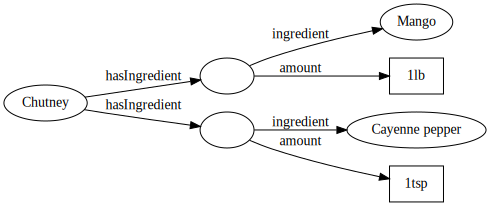

In [127]:
g

### Turtle syntax

```
@prefix ex: <http://example.org/> . 

ex:Chutney ex:hasIngredient [ ex:ingredient ex:Mango; ex:amount "1lb" ] ,
                            [ ex:ingredient ex:Cayenne_pepper; ex:amount "1tsp" ] .

```

### Turtle Parsing Results

In [80]:
# go to http://librdf.org/parse,
# paste the solution above, 
# copy the result table to clipboard
pd.read_clipboard()

,Subject,Predicate,Object
0,http://example.org/Chutney,http://example.org/hasIngredient,blank node r1615917324r13333r2
1,http://example.org/Chutney,http://example.org/hasIngredient,blank node r1615917324r13333r1
2,blank node r1615917324r13333r2,http://example.org/amount,1tsp
3,blank node r1615917324r13333r2,http://example.org/ingredient,http://example.org/Cayenne_pepper
4,blank node r1615917324r13333r1,http://example.org/amount,1lb
5,blank node r1615917324r13333r1,http://example.org/ingredient,http://example.org/Mango


### 2.3:Q3 Exercise:
Write the Turtle syntax which is equivalent to the below illustration. Notice the deferenceable blank nodes have ids which make them easier to reference from within a single graph.

<img src="ex2.3.png">


```
@prefix dbp: <http://dbpedia.org/resource/> .
@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix dbpp: <https://dbpedia.org/property/> .
@prefix ex: <http://www.example.com/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
        
dbp:Walter_White_Breaking_Bad dbpp:portrayer dbp:Brain_Cranson ;
                                dbo:series dbp:Breaking_Bad ;
                                dbo:spouse dbp:Skyler_White ;
                                rdfs:label "Walter White"@en ;
                                dbo:alias "Heisenberg"@en ;
                                ex:affiliation _:1, _:2 .
                                            
                                
                            _:1 ex:affiliationPlace ex:Winnebago ;
                                        rdf:type ex:DrugDealer .
                                    
                            _:2 ex:affiliationPlace ex:J._P._Wynne_High_School;
                                        rdf:type ex:Teacher .
```

### Turtle Parsing Results

In [79]:
# go to http://librdf.org/parse,
# paste the solution above, 
# copy the result table to clipboard
pd.read_clipboard()      

,Subject,Predicate,Object
0,blank node r1615913820r11014r2,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.example.com/Teacher
1,blank node r1615913820r11014r2,http://www.example.com/affiliationPlace,http://www.example.com/J._P._Wynne_High_School
2,blank node r1615913820r11014r1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.example.com/DrugDealer
3,blank node r1615913820r11014r1,http://www.example.com/affiliationPlace,http://www.example.com/Winnebago
4,http://dbpedia.org/resource/Walter_White_Break...,http://www.example.com/affiliation,blank node r1615913820r11014r2
5,http://dbpedia.org/resource/Walter_White_Break...,http://www.example.com/affiliation,blank node r1615913820r11014r1
6,http://dbpedia.org/resource/Walter_White_Break...,http://dbpedia.org/ontology/alias,Heisenberg@en
7,http://dbpedia.org/resource/Walter_White_Break...,http://www.w3.org/2000/01/rdf-schema#label,Walter White@en
8,http://dbpedia.org/resource/Walter_White_Break...,http://dbpedia.org/ontology/spouse,http://dbpedia.org/resource/Skyler_White
9,http://dbpedia.org/resource/Walter_White_Break...,http://dbpedia.org/ontology/series,http://dbpedia.org/resource/Breaking_Bad


### 2.3:Q4 Discussion: 
* What are the pros and cons of using blank nodes? 
* Are there tools that convert between Turtle and RDF/XML?
    * see also: The W3C Validator is found at http://www.w3.org/RDF/Validator/

## 2.4 RDF Complex Data Structures
* __RDF lists__ - helper construct (syntactic sugar)
    * Containers - open lists which can be extended
        * Bag - unordered set
        * Seq - ordered set
        * Alt - alternative
        * A container is a blank node like: `ex:contain [a rdf:Bag ; ... ]` 
    * Collections - closed lists like a *linked list* in OOP which has a *Head* and a *Tail*
        * A collection is defined by `ex:contain (...)`


* __Reification__ - statements about statements
    * a triple represented as an entity: `rdf:Statement`
    * Uses:
        * Provenance
        * Reliability/Trust
        * Metadata
    * Gotchas:
        * Type conflicts
        * infinte loops
        

### 2.4:Q1
Express the list of authors of the semantic web book as a Collection.   

Authors: 
* Hitzler
* Krötzsch
* Rudolph

```
@prefix book: <http://semantic-web-book.org/> . 
@prefix ex: <http://example.com/> . 

book:uri <http://example.org/authors> ( book:uri/Hitzler book:uri/Krötzsch book:uri/Rudolph ) .
```

<img src="collection.png">

### 2.4:Q2
*(book Exercise 2.4)*  
Represent the following sentences graphically by means of reified triples:
* Romeo thought that Juliet was dead. 
* John believes that Mary wants to marry him. 
* The dwarf noticed that somebody had been eating from his plate.

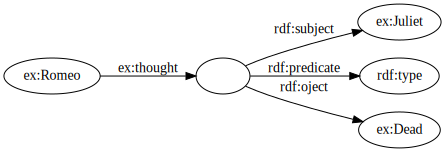

In [134]:
'''
Romeo thought that Juliet was dead.
'''
# Note that in most cases, statements including forms of “to be” are best translated into a rdf:type statement. (why?)

g = Digraph()
g.graph_attr['rankdir'] = 'LR'

g.node('A', 'ex:Romeo')
g.node('B','')
g.node('C','ex:Juliet')
g.node('D','rdf:type')
g.node('E', 'ex:Dead')

g.edge('A', 'B', label='ex:thought')
g.edge('B', 'C', label='rdf:subject')
g.edge('B', 'D', label='rdf:predicate')
g.edge('B', 'E', label='rdf:oject')
g

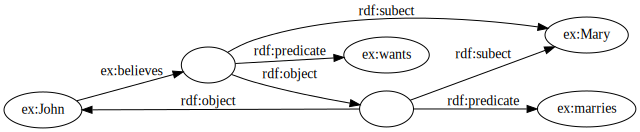

In [149]:
'''
John believes that Mary wants to marry him.

John believes X
X: Mary wants Y
Y: Mary marries John

'''

g = Digraph()
g.graph_attr['rankdir'] = 'LR'

g.node('A', 'ex:John')
g.node('B','')
g.node('C','ex:Mary')
g.node('D','ex:wants')
g.node('E','')
g.node('F','ex:marries')

g.edge('A', 'B', label='ex:believes')

g.edge('B', 'C', label='rdf:subect')
g.edge('B', 'D', label='rdf:predicate')
g.edge('B', 'E', label='rdf:object')

g.edge('E', 'C', label='rdf:subect')
g.edge('E', 'F', label='rdf:predicate')
g.edge('E', 'A', label='rdf:object')



g

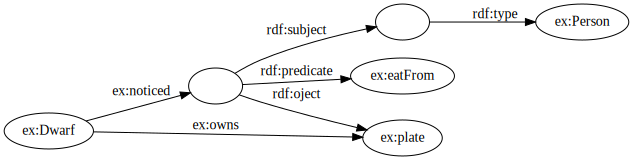

In [145]:
'''
The dwarf noticed that somebody had been eating from his plate.

Dwarf noticed X
Dwarf owns plate
X: Someone eatingFrom plate

'''


g = Digraph()
g.graph_attr['rankdir'] = 'LR'

g.node('A', 'ex:Dwarf')
g.node('B','')
g.node('C','') 
g.node('D','ex:eatFrom')
g.node('E','ex:plate')
g.node('G','ex:Person') #Someone

g.edge('A', 'B', label='ex:noticed')
g.edge('A', 'E', label='ex:owns')
g.edge('B', 'C', label='rdf:subject')
g.edge('B', 'D', label='rdf:predicate')
g.edge('B', 'E', label='rdf:oject')

g.edge('C','G', label='rdf:type')
g

### 2.4:Q2 Discussion: 
* What are some alternative ways to model these? What are pros and cons?

## 2.5 Model Building with RDFS

### Semantic expressivity - "meaning"
#### RDF Schema - RDF Vocabulary Description Language
RDF is extended to the *ontology language* RDF Schema (RDFS)
* Classes and class instantiation
* Properties with domain and range restrictions
* Everything in RDF is an RDF Resource

Example:
```
ex:Textbook rdf:type rdfs:Class . 
book:uri rdf:type ex:Textbook . 
ex:Textbook rdfs:subClassOf ex:Book . 
ex:Book rdfs:subClassOf ex:PrintMedia .
ex:Journal rdfs:subClassOf ex:PrintMedia .
ex:MorningStar rdfs:subClassOf ex:Journal .
ex:EveningStar rdfs:subClassOf ex:Journal .

rdfs:Class rdf:type rdfs:Class . 
```
__Notational convention:__ URIs representing classes are usually capitalized, whereas names for instances and properties are written in lower case.

### 2.5:Q1
Using the above example,    
    1) write a triple which illustrates the *transitive* relationship    
    2) write a triple which illustrates the *reflexive* relationship    
    3) provide an example which illustrates *extensionally equivalent* classes   

```
1. ex:Textbook rdf:type ex:Book
2. ex:Book rdfs:subClassOf ex:Book . 
3. ex:MorningStar rdfs:subClassOf ex:EveningStar .
   ex:EveningStar rdfs:subClassOf ex:MorningStar .
```

### 2.5:Q2
Domain and range restrictions constitute the “semantic link” between classes and properties.    

Given the triple: `a ex:isMarriedTo b .`, write the domain and range restrictions for `isMarriedTo` which will allow us to assert that both `a` and `b` are of `rdf:type ex:Person`

```
a rdf:type ex:Person .
b rdf:type ex:Person .
        
ex:isMarriedTo rdfs:domain ex:Person ,
                rdfs:range ex:Person .
```           

### 2.5:Q3 
*(book Exercise 2.5)*    
Decide whether the following propositions can be satisfactorily modeled in RDFS and, if so, give the corresponding RDF(S) specification.
1. Every pizza is a meal. 
2. Pizzas always have at least two toppings. 
3. Every pizza from the class PizzaMargarita has a Tomato topping. 
4. Everything having a topping is a pizza.
5. No pizza from the class PizzaMargarita has a topping from the class Meat.
6. “Having a topping” is a containedness relation.

```
1. ex:Pizza rdf:type ex:Class .   
   ex:Meal rdf:type Pizza .
   
   ---------------- OR ---------------------
   
   ex:Pizza rdfs:subClassOf ex:Meal .   
   
   ---------------- OR ---------------------
   
   ex:Pizza rdf:type ex:Meal .
   
2. "at least" is not possible in RDFs
3. ex:PizzaMargarita dbpp:hasTopping ex:Tomato .       
4. cannot be modelled in RDFs
5. negation is not possible in RDFs
6. ex:hasTopping rdf:type rdfs:ContainerMembershipProperty .
```

### 2.5:Q3 Discussion:
* In number 1 above, are all three solutions valid? 

## 2.6 Logical Inference with RDF(S)
* __Formal semantics__ the logical dimension of the notion of semantics. Allows us to draw sound and valid logical inferences
* First Order Logic

### NOTE: Probably not a practical use of time, since FOL is not feasab;e in the real world. 

## 2.7 Excursion 1 RDFa - RDF on the Web
* Microformats - use native html markup like `class`, `span`, etc., ex: `<div class="vcard"`>
* RDFa - RDF in html __a__ttributes like `href`, `src`, `vocab`, etc. ex: `<p vocab="http//xmlns.com/foaf/0.1/" typeof="Person">`
* HTML5 and schema.org

### 2.7:Q1 Discussion:
* Obstacles to adoption 

### 2.7:Q2 Discussion:
* RDFa for SEO

## See also
There are also very good exercises and projects at the end of Chapter 2 of A Semantic Web Primer.